In [6]:
import pandas as pd
import hanzidentifier
from langdetect import detect
import matplotlib.pyplot as plt
import tweets
from statistics import mean

# Who are they speaking to?

The purpose for this notebook is to determine who these tweets are addressed to. The primary feature that we will be determining is tweet language.

In [7]:
tweets1 = pd.read_csv("../data/tweets1.csv").drop_duplicates()
users1 = pd.read_csv("../data/users1.csv").drop_duplicates()

/Users/nlee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6,15,19,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [85]:
tweet, user = tweets.find_random_user(users1, tweets1)

<ipython-input-37-5e7b3b471152>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_time"] = pd.to_datetime(df["tweet_time"], errors="coerce")


## Frequency of Chinese Tweets Among Individual Users

First, we wanted to be able to visualize, for a specific user, the frequency of Chinese usage. We've previously determined that many of these suspended accounts have transitioned to chinese, but do they proceed bilingual?

In [129]:
def create_graph(tweet_df, title):
    content = tweet_df[["tweet_time", "tweet_text"]].copy()
    content["tweet_time"] = content["tweet_time"].apply(lambda x: str(x.year)+"-"+str(x.month))
    content["tweet_time"] = pd.to_datetime(content["tweet_time"])

    content["chinese"]=content["tweet_text"].apply(hanzidentifier.has_chinese)
    content["not_chinese"]=content["tweet_text"].apply(lambda x: not hanzidentifier.has_chinese(x))
    chinese = content.groupby("tweet_time")[["chinese", "not_chinese"]].agg('mean').reset_index()

    plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.title(figure_title)
    plt.plot( 'tweet_time', 'chinese', data=chinese, marker='o', markerfacecolor='darkcyan', markersize=5, color='teal', linewidth=1)
    plt.plot( 'tweet_time', 'not_chinese', data=chinese, marker='o', markerfacecolor='lightsteelblue', markersize=5, color='lavender', linewidth=1)
    plt.legend()

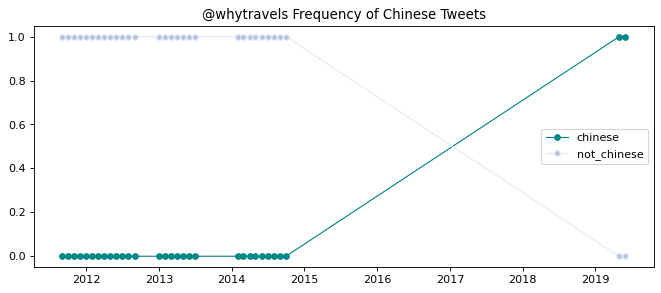

In [130]:
figure_title = "@" + user["user_screen_name"].item() + " Frequency of Chinese Tweets"
create_graph(tweet, figure_title)

## Frequency of Chinese Tweets Among All Tweets

Then we wondered the same for all of the tweets. 

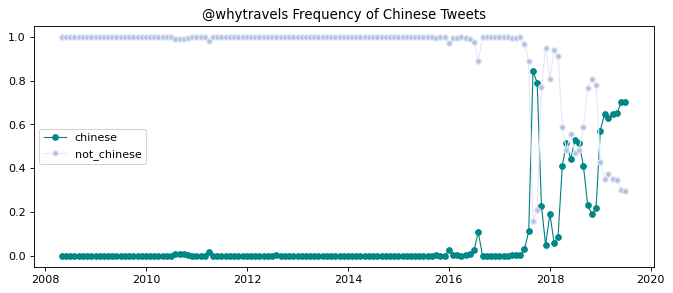

In [131]:
content["tweet_time"] = pd.to_datetime(content["tweet_time"], errors="coerce")
create_graph(content, "Frequency of Chinese in All Tweets")

It seems that generally non-Chinese accounts have switched to majority Chinese, but non-Chinese tweets exist as well.

## Traditional vs Simplified Chinese

After realizing that majority of the tweets were in Chinese, we were left wondering who the tweets were targeting. Were they targeting overseas Chinese? Hong Kong citizens? Even Taiwanese citizens? Knowing that only mainland China usings simplified Chinese, we wondered if we could determine their target audience with that in mind.

In [171]:
# Preprocess data
dialect = tweets1[["tweet_time", "tweet_text"]].copy()
dialect["traditional"] = dialect["tweet_text"].loc[dialect["tweet_text"].apply(hanzidentifier.has_chinese)].apply(hanzidentifier.is_traditional)
dialect["simplified"] = dialect["tweet_text"].loc[dialect["tweet_text"].apply(hanzidentifier.has_chinese)].apply(hanzidentifier.is_simplified)

dialect = dialect.loc[~dialect["traditional"].isnull()]
dialect["tweet_time"] = pd.to_datetime(dialect["tweet_time"]).apply(lambda x: str(x.year)+"-"+str(x.month))

dialect = dialect[["traditional", "simplified", "tweet_time"]].groupby("tweet_time").agg(lambda x: mean(list(x))).reset_index()
dialect["tweet_time"] = pd.to_datetime(dialect["tweet_time"])

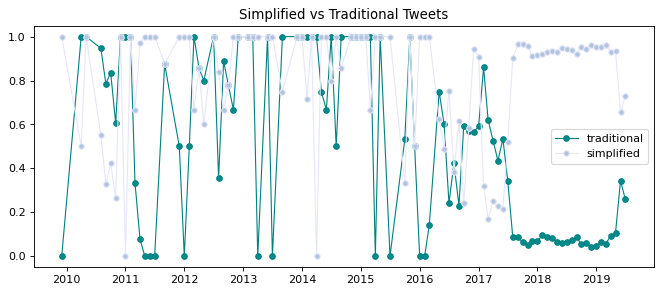

In [183]:
# Plot figure
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title("Simplified vs Traditional Tweets")
plt.plot( 'tweet_time', 'traditional', data=dialect, marker='o', markerfacecolor='darkcyan', markersize=5, color='teal', linewidth=1)
plt.plot( 'tweet_time', 'simplified', data=dialect, marker='o', markerfacecolor='lightsteelblue', markersize=5, color='lavender', linewidth=1)
plt.legend()

While it seems like the results began mixed (and extreme, likely due to the shortage of tweets), we see that majority of the Chinese tweets after the transfer are in simplified Chinese.

In [18]:
tweets1.groupby("tweet_language")[["reply_count", "quote_count", "like_count"]].agg(["sum", "count", "mean"])

reply_count                   quote_count                    \
                       sum   count      mean         sum   count      mean   
tweet_language                                                               
ar                     1.0     307  0.003257         0.0     307  0.000000   
bg                     0.0      11  0.000000         0.0      11  0.000000   
bn                     0.0       6  0.000000         0.0       6  0.000000   
bs                    31.0      52  0.596154         0.0      52  0.000000   
ca                    11.0      64  0.171875         3.0      64  0.046875   
cs                    77.0     871  0.088404        10.0     871  0.011481   
cy                   205.0    1258  0.162957         5.0    1258  0.003975   
da                   214.0    1211  0.176713        13.0    1211  0.010735   
de                   317.0    2297  0.138006        13.0    2297  0.005660   
el                     2.0       6  0.333333         1.0       6  0.166667   
en                 13146.0  375356  0.035023       857.0  375356  0.002283   
es                  3303.0   32710  0.100978        52.0   32710  0.001590   
et                  2503.0    8744  0.286253        49.0    8744  0.005604   
eu                   172.0     383  0.449086        19.0     383  0.049608   
fa                     0.0       1  0.000000         0.0       1  0.000000   
fi                   252.0    3634  0.069345        10.0    3634  0.002752   
fr                   283.0    6345  0.044602        17.0    6345  0.002679   
hi                   173.0     556  0.311151        11.0     556  0.019784   
hr                    39.0      80  0.487500         0.0      80  0.000000   
ht                  1546.0    5470  0.282633        89.0    5470  0.016271   
hu                   186.0     765  0.243137        17.0     765  0.022222   
hy                     0.0       1  0.000000         0.0       1  0.000000   
id                  1466.0    6133  0.239035         0.0    6133  0.000000   
in                 77168.0  791242  0.097528      6118.0  791242  0.007732   
is                   106.0     650  0.163077         9.0     650  0.013846   
it                   333.0    1292  0.257740        23.0    1292  0.017802   
ja                   541.0    8249  0.065584       108.0    8249  0.013092   
km                     0.0       1  0.000000         0.0       1  0.000000   
kn                     1.0       1  1.000000         0.0       1  0.000000   
ko                   198.0   13136  0.015073        61.0   13136  0.004644   
lt                   165.0     534  0.308989        13.0     534  0.024345   
lv                   193.0     607  0.317957        12.0     607  0.019769   
nl                   513.0    7367  0.069635        36.0    7367  0.004887   
no                   211.0    2431  0.086796        12.0    2431  0.004936   
pl                   524.0    2321  0.225765        20.0    2321  0.008617   
pt                  2165.0  182498  0.011863        21.0  182498  0.000115   
ro                   258.0    1605  0.160748         8.0    1605  0.004984   
ru                     2.0     409  0.004890         0.0     409  0.000000   
sk                   124.0     447  0.277405         0.0     447  0.000000   
sl                   146.0     511  0.285714         4.0     511  0.007828   
sr                     0.0       1  0.000000         0.0       1  0.000000   
sv                   138.0    5298  0.026048         8.0    5298  0.001510   
ta                     0.0       4  0.000000         0.0       4  0.000000   
th                    82.0     324  0.253086         2.0     324  0.006173   
tl                  4238.0   19420  0.218229       212.0   19420  0.010917   
tr                  1051.0    2797  0.375760        59.0    2797  0.021094   
uk                     0.0      44  0.000000         0.0      44  0.000000   
und                 5851.0   73215  0.079915       710.0   73215  0.009697   
ur                     1.0      14  0

In [13]:
tweets1.dtypes

tweetid                       int64
userid                       object
user_display_name            object
user_screen_name             object
user_reported_location       object
user_profile_description     object
user_profile_url             object
follower_count                int64
following_count               int64
account_creation_date        object
account_language             object
tweet_language               object
tweet_text                   object
tweet_time                   object
tweet_client_name            object
in_reply_to_userid           object
in_reply_to_tweetid         float64
quoted_tweet_tweetid        float64
is_retweet                     bool
retweet_userid               object
retweet_tweetid             float64
latitude                     object
longitude                    object
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_count               float64
hashtags                    

In [14]:
# def determine_language(user):
#     language = []
#     for i in list(user):
#         try:
#             de = detect(i)
#             chinese = hanzidentifier.has_chinese(i)
#             if chinese == True:
#                 language.append("zh-ch")
#             else:
#                 language.append(de)
#         except: 
#             language.append("no features")
#     return language

In [15]:
# languages = []
# for i in range(10):
#     name = users1["user_display_name"].iloc[i]
#     user = tweets1.loc[tweets1["user_display_name"] == name]["tweet_text"]
#     languages += determine_language(user)